In [3]:
using TaylorSeries 
using PyPlot
using LinearAlgebra


In [4]:
"""

PolinomioTaylor1(g,CX,CY,TipoVariable)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.




Argumentos:





   - g       : Grado del polinomio
   - CX,CY  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{}}
   - TipoVariable :  es el tipo del que serán los coeficientes ( Real, Float64, BigFloat)
   

Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


"""
function PolinomioTaylor1(g::Real,CX,CY,TipoVariable)
    #=
    g es el grado del polinomio, CX y CY son
    arreglos que contienen los coeficientes que forman la variedad.
    
    
    Creamos x,y como variables tipo TaylorN de orden 2
    =#
    x,y = set_variables(TipoVariable, "x y", order=2)
    
    #especificamos que LX,LY son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    LX = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    LY = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    
    #usamos un condicional para separar el caso 1 del resto
    if g == 1  
        T = [Taylor1([x], g),Taylor1([y], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como CX,CY están guardando los coeficientes pero necesitamos agregar el último término que será una variable 
        LX = push!(CX, x) 
        LY = push!(CY, y)

        T=[Taylor1(LX, g),Taylor1(LY, g)]
        
    end
    return T
end
#Esta función regresa tx,ty que son Taylor1.TaylorN

PolinomioTaylor1

In [5]:
?PolinomioTaylor1

search:



PolinomioTaylor1(g,CX,CY,TipoVariable)

Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.

Argumentos:

  * g       : Grado del polinomio
  * CX,CY  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{}}
  * TipoVariable :  es el tipo del que serán los coeficientes ( Real, Float64, BigFloat)

Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


In [6]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λ_v,g,CX,CY)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{T}


Sus argumentos son:



- g      :  grado del polinomio.
- λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias. 
- CX,CY  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""
function Vecλ(λ_v,g,CX,CY)
   # el arreglo de λ_v contiene los arreglos que corresponden a la parte derecha de la ecuación cohomológica
    # en θ,p. Es importante hacer la distinción puesto que dependiendo del punto fijo donde se esté calculando
    # el primer valor de λ en θ serpa diferente del primer valor de λ en P
    xλt=Taylor1(λ_v[1].*CX,g)
    yλt=Taylor1(λ_v[2].*CY,g)
    
    λvec=[xλt,yλt]
    
    return λvec
end

Vecλ

In [7]:
?Vecλ

search: vec Vector vecdot vecnorm VecOrMat VecElement @vectorize_2arg



Vecλ(λ_v,g,CX,CY) Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio. Regresa un arreglo de tipo TaylorSeries.TaylorN{T}

Sus argumentos son:

  * g      :  grado del polinomio.
  * λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias.
  * CX,CY  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.


In [168]:
function ValPropios(M)
    V = BigFloat[]
    
    #while true
        disc = trace(M)^2-4.*det(M)
        tol = disc -trace(M)^2
        if  tol < 1e-70
            println("Para este caso el método de calculo de valores propios no es eficiente")
            #break
        else
            disc >= 0.? v = ((trace(M) + sqrt(trace(M)^2-4.*det(M)))/2.,(trace(M) - sqrt(trace(M)^2-4.*det(M)))/2.)  : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            v_prop1 = v[2]
            v_prop2 = v[1]
            push!(V,v_prop1)
            push!(V,v_prop2)
            #ValoresP = sort(V,rev=true)
            ValoresP=V
        end
    #end
return ValoresP
end
        
    
    
    

ValPropios (generic function with 1 method)

In [170]:
function VecPropios(M,ValoresP)
    Vectores = []
    for i in [1,2]
        y = big.(1.)
        I_2 = big.([1. 0.; 0. 1.])
        M_aux = -I_2.*ValoresP[i]+M
        x = -(y*M_aux[3])/M_aux[1]
        push!(Vectores,x)
        push!(Vectores,y)
    end
    return Vectores
end

VecPropios (generic function with 1 method)

In [171]:
function EigenValores(M)
    ValoresP  = ValPropios(M)
    VectoresP = VecPropios(M,ValoresP)
    V = (ValoresP,[VectoresP[1] VectoresP[3];VectoresP[2] VectoresP[4]])
    return V
end

EigenValores (generic function with 1 method)

In [172]:
function Orden1(CX,CY,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayX,λarrayY)
            #usamos la función PolinomioTaylor para crear el polinomio tipo Taylor1.TaylorN{T}
            t = PolinomioTaylor1(1,CX,CY,TipoVariable)
            
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k,l)
            
            AuxOr1=[Or1[1][1],Or1[2][1]]
            
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(AuxOr1,[PuntoFijo[1],PuntoFijo[2]])
            
            
            
            #Calculamos los valores y vectores propios
            if TipoVariable == BigFloat
                eigval,eigvec = EigenValores(JPO)
            else
                eigval,eigvec = eig(JPO)
            end
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
    
            tt = imag(λ)
            
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            tt == 0.?  Coef = eigvec[:,tipo_v] : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            
            
            push!(CX, Coef[1])
            push!(CY, Coef[2])
            push!(λarrayX, λ)
            push!(λarrayY, λ)
            λ_v=[λarrayX,λarrayY]
            
            
    return CX, CY,λarrayX,λarrayY, λ_v
end
            
    

Orden1 (generic function with 1 method)

In [173]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v,TipoVariable)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:



- Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
- orden : se trata del orden del polinomio.
- PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
- k     : Es la constante del mapeo.
- tipo_v : 1 si la variedad es estable, 2 si es inestable.
- TipoVariable :  Float64,BigFloat, Integer,etc.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,l,tipo_v, TipoVariable)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    
    a=TipoVariable(PuntoFijo[1])
    b=TipoVariable(PuntoFijo[2])
    CX = [a+TaylorN(0.)]
    CY = [b+TaylorN(0.)]
    
    
    #λarray es la lista que contiene a los coeficientes del polinomio de λ
    λarrayX = [a^0]
    λarrayY = [b^0]
    
    #definimos un vector que contiene el punto en el que se evalúa el jacobiano que se calcula después
    #dado que sólo lo usamos para obtener los valores que resultaron en el mapeo evaluamos siempre en [1.,1.]
    
    
    
    
    CX,CY,λarayX, λarrayY,λ_v = Orden1(CX,CY,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayX,λarrayY)
    


    for g in 2:orden
        
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,CX,CY,TipoVariable)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k,l)
            
            push!(λarrayX,λarrayX[2]^g)
            push!(λarrayY,λarrayY[2]^g)
            λ_v=[λarrayX,λarrayY]
            
            #agregamos el término correspondiente a λ 
            λ_vec=Vecλ(λ_v,g,CX,CY)
            
            
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            X_g=EcuaCohomo[1].coeffs[g+1]
            Y_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[X_g,Y_g]
            
            
            #calculamos el término independiene en la ecuación
            X_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            Y_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-X_ind,-Y_ind]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    
                    CX[g+1]=0.
                    CY[g+1]=0.
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                
                CX[g+1]=TermG[1]
                CY[g+1]=TermG[2]
            
            end
            

    end
    return CX,CY,λarrayX, λarrayY
end

Variedades

In [174]:
"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:




- Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
- Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
- k     : es el valor de la constante del mapeo 
- λvec : 

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,l ,PuntoFijo,modulo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k,l)
    if modulo==2*pi
        Ec_Cohomo = mod(Map_vec-λvec,modulo)
    else
        Ec_Cohomo = Map_vec-λvec
    end
    return Ec_Cohomo
end

PolinomioCohomo

In [175]:
"""
EvaluarPol(Ec_2var,Tiempo,paso)

Es una función que toma un arreglo de dos dimensiones que contiene polinomios y los evalúa en el tiempo dado en los pasos deseados




Argumentos:




- Ec_2var : Arreglo de dos dimensiones que contiene polinomios en cada una de ellas. 
- Tiempo  : Valor hasta el cual se quiere evaluar cada polinomio
- paso    : es el paso que se considera en cada evaluación del polinomio. 

"""
function EvaluarPol(Ec_2var,Tiempo,paso,TipoVariable)
    
    
    
    
    
    Val=TipoVariable[]
    Tiem=TipoVariable[]
    
    
    for t = 0:paso:Tiempo
        x = evaluate(Ec_2var[1], t)
        y = evaluate(Ec_2var[2], t)

        
        norma = norm([x,y],Inf)
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

EvaluarPol

In [176]:
"""
CreaPol es una función que dadas dos listas y un grado crea  un arreglo de dos entradas , en cada una de ellas se encuentra 
el polinomio de grado g con los coeficientes de las listas. 


Argumentos:



- A,B : arreglos que contienen lo que serán los coeficientes del polinomio.
- orden : grado del polinomio
"""
function CreaPol(A,B,orden)
    Taylor = [Taylor1(A,orden),Taylor1(B,orden)]
    return Taylor
end

CreaPol

In [177]:
function MetParametrización(Mapeo,modulo,orden,PuntoFijo,k,l,tipo_v,Tiempo,paso, TipoVariable)
    CoeficienteX,CoeficienteY,λarrayX,λarrayY = Variedades(Mapeo,orden,PuntoFijo,k,l,tipo_v,TipoVariable)
        
    
    X = TipoVariable[]
    Y = TipoVariable[]
    
    for i in 1:orden+1
            
        push!(X,CoeficienteX[i].coeffs[1].coeffs[1])
        push!(Y,CoeficienteY[i].coeffs[1].coeffs[1])
        
    end
    
    Taylor=CreaPol(X,Y,orden)
    
    λ_vec=CreaPol(X.*λarrayX,Y.*λarrayY,orden)
    
    
    
    Ecua_Cohomo = PolinomioCohomo(Mapeo,Taylor,λ_vec, k,l,PuntoFijo,modulo)
    Valor_t , Error = EvaluarPol(Ecua_Cohomo,Tiempo,paso, TipoVariable)
    ErrorV = [Valor_t,Error]
    
    
    #return Taylor,ErrorV,λ_vec
    return Ecua_Cohomo,Taylor,λ_vec
   
end

MetParametrización (generic function with 1 method)

Aquí vemos que si el punto  que se introduce es elíptico entonces resulta un error.

In [97]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

In [98]:
#Usando Float64
Polinomio,E,ValProp = MetParametrización(Henon,1., 25, [.22,.22], .5, 1., 2, 2.9, 0.125, Float64)

LoadError: Error: el valor propio es complejo, es decir es un punto elíptico

Calculamos el mismo polinomio pero ahora usando BigFloat para ver la diferencia sobre todo en el error. 

In [99]:
#Usando BigFloat
PolinomioB,EBig,ValPropB = MetParametrización(Henon,1.,25,[.22,.22],.5 ,1.0,2,2.9,0.125,BigFloat)

LoadError: Error: el valor propio es complejo, es decir es un punto elíptico

Graficamos ahora para valores en los que estamos seguron son puntos hiperbólicos.

In [181]:
parametro = 0.3.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


LoadError: syntax: invalid numeric constant "0.3."

In [120]:
#Polinomio,E,ValProp = MetParametrización(Henon,1., 25, [x2,x2], parametro, 1., 2, 60., 0.125, Float64)
tf,lf= MetParametrización(Henon,1., 25, [x2,x2], parametro, 1., 2, 60., 0.125, Float64)

LoadError: UndefVarError: Ec_Cohomo not defined

In [182]:
#PolinomioB,EBig,ValPropB = MetParametrización(Henon, 1., 25, [x2,x2], parametro, 1., 1, 60., 0.125, BigFloat)
ecco,tb,lb = MetParametrización(Henon, 1., 25, [x2,x2], parametro, 1., 2, 60., 0.125, BigFloat)


Para este caso el método de calculo de valores propios no es eficiente


LoadError: UndefVarError: ValoresP not defined

In [143]:
SB = Henon(tb[1],tb[2],1.,1.)

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
  - 2.414213562373094568825379766674431049611329861874967768443304289016637653730868 + 2.126668659948376686198496812579230517642022236268279852108363272875517859197767e+01 t - 2.743489471932366254120432022391364420831097991972494330196715051633552346311512e+01 t² + 1.251300941484912197621767135709228372279567982338807246638420771862566115902303e+01 t³ - 2.871619560722643828228855751948620694093109443567274481612406290940211942316716 t⁴ + 3.886495962970754371936471693671044880002317096523686820978517516484371692134791e-01 t⁵ - 3.439654893781989094955714509447712889451358146800488272851843346286702830296001e-02 t⁶ + 2.134193327648481478324490115267208227451794551933498126266095833164571705808031e-03 t⁷ - 9.753671540554923798914134559424313967852149876388538777345022869557181712807859e-05 t⁸ + 3.407387262736805440414765119013957962431589677658739826514990123908847070958403e-06 t⁹ - 9.3676870808504801127947789017610275669628429256620499867

In [151]:
println(lb[1].coeffs[1]-SB[1].coeffs[1])
println(SB[1].coeffs[1])

-3.546046371670330893161036969935937822315566957109833623462691321037709712982178e-16
-2.414213562373094568825379766674431049611329861874967768443304289016637653730868


In [150]:
ecco[1].coeffs

26-element Array{BigFloat,1}:
  3.546046371670330893161036969935937822315566957109833623462691321037709712982178e-16 
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  2.763573937630222280123632596096127862757120116619610043207585110453949377011977e-76 
 -1.381786968815111140061816298048063931378560058309805021603792555226974688505988e-76 
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  5.397605346934027890866469914250249731947500227772675865639814668855369876976517e-79 
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000     
  

In [124]:
ecuab

2-element Array{TaylorSeries.Taylor1{BigFloat},1}:
                                                                                                                                                                                        5.527147875260444560247265192192255725514240233239220086415170220907898754023953e-76 t² - 1.381786968815111140061816298048063931378560058309805021603792555226974688505988e-76 t³ - 4.216879177292209289739429620508007603083984552947403020031105210043257716387904e-81 t⁷ - 1.31777474290381540304357175640875237596374517279606344375972037813851803637122e-82 t⁸ + 2.513455854232435995185035240952973129203310342399718177337113147999797890417519e-88 t¹¹ + 4.681676354692198327155849413858676569915023338794183316337155453860383276674000e-97 t¹⁵ + 1.064489960002037679977513429061827212061649183577670400231262522961602207186388e-109 t²⁰ + 2.079081953128979843706080916136381273557908561675137500451684615159379310910914e-112 t²¹ + 4.06070693970503875723843928932886967491

Graficaremos el error cometido que es el que nos dirá cuanta diferencia hay entre tipos de números. 

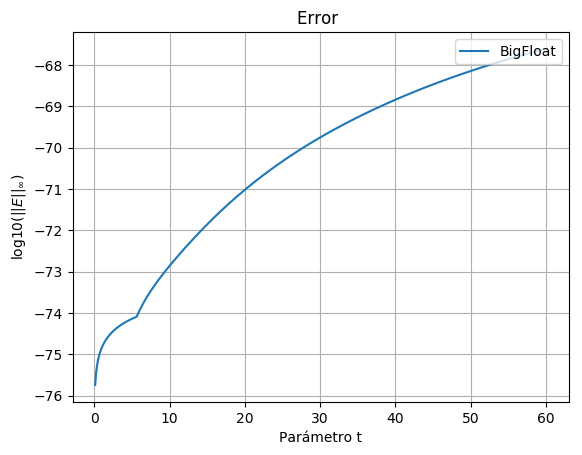

PyObject <matplotlib.legend.Legend object at 0x7f032b501110>

In [136]:
#plot(E[1],log10(E[2]),marker= "None", label="Float")
plot(error[1],log10(error[2]),marker= "None", label="BigFloat")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Para observar cómo va la variedad graficaremos el espacio fase

In [22]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B,vari)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",label = vari)
    
end

evaluar (generic function with 1 method)

In [23]:
function Graficar(Tiempo, paso, k,l,A,B,vari)
    #graficarMap(k,l)
    evaluar(Tiempo,paso,A,B,vari)
end

Graficar (generic function with 1 method)

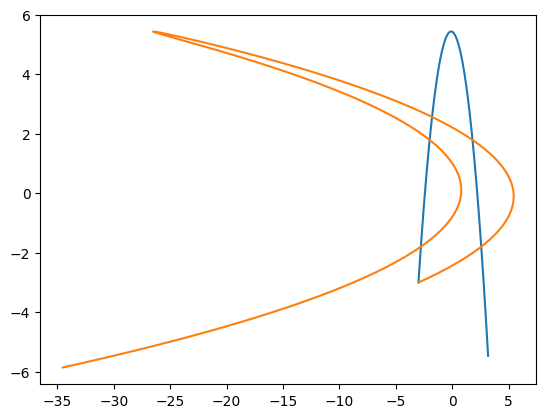

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f94581819d0>

In [24]:
Graficar(50.7,0.025,8.,1.,Polinomio[1],Polinomio[2],"estable")
Graficar(50.7,0.025,8.,1.,PolinomioB[1],PolinomioB[2],"inestable")

In [164]:
M=[big(1.) 1.; 2 1]

2×2 Array{BigFloat,2}:
 1.000000000000000000000000000000000000000000000000000000000000000000000000000000  …  1.000000000000000000000000000000000000000000000000000000000000000000000000000000
 2.000000000000000000000000000000000000000000000000000000000000000000000000000000     1.000000000000000000000000000000000000000000000000000000000000000000000000000000

In [153]:
using LinearAlgebra

In [165]:
valA=LinearAlgebra.EigenGeneral.eigvals!(M)

2-element Array{Complex{BigFloat},1}:
     2.414213562373095048801688724209698078569671875376948073176679737990732478462085+0.000000000000000000000000000000000000000000000000000000000000000000000000000000im
 -4.14213562373095048801688724209698078569671875376948073176679737990732478462102e-01-0.000000000000000000000000000000000000000000000000000000000000000000000000000000im

In [166]:
real(valA)

2-element Array{BigFloat,1}:
  2.414213562373095048801688724209698078569671875376948073176679737990732478462085   
 -4.14213562373095048801688724209698078569671875376948073176679737990732478462102e-01

In [169]:
ValPropios(M)

2-element Array{BigFloat,1}:
 -4.14213562373095048801688724209698078569671875376948073176679737990732478462102e-01
  2.414213562373095048801688724209698078569671875376948073176679737990732478462085   